In [97]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#/content/drive/My Drive/

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
%%time
train_transaction = import_data('train_transaction.csv')
test_transaction = import_data('test_transaction.csv')
print('train transaction size:', len(train_transaction))
print('test transaction size:', len(test_transaction))

Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 542.35 MB
Decreased by 69.4%
Memory usage of dataframe is 1519.24 MB
Memory usage after optimization is: 472.59 MB
Decreased by 68.9%
train transaction size: 590540
test transaction size: 506691
Wall time: 3min 29s


In [4]:
#%%time
#train_transaction = pd.read_csv('train_transaction.csv')
#test_transaction = pd.read_csv('test_transaction.csv')
#print('train transaction size:', len(train_transaction))
#print('test transaction size:', len(test_transaction))
#%timeit

In [5]:
train_transaction.shape

(590540, 394)

In [6]:
test_transaction.shape

(506691, 393)

In [7]:
train_data = train_transaction.copy()
test_data = test_transaction.copy()

In [8]:
#test_data = test_transaction.copy()

In [9]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#test_data.head()
#test_data.columns()

In [11]:
#sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

# Cutting out the nulls of the data
168 969 is the highest number of nulls in the table below and thats about 28%, which seems fine.




168 969/590 000 = 0.2864

In [12]:
#train_data.isnull().sum().sort_values(ascending=False)

In [13]:
#all_headers = [h[1] for h in test_data[0]]

In [14]:
#test_data2 = test_data.copy()
#test_data2 = test_data2.drop(columns)

In [15]:
#test_data2.shape

In [16]:
#columnsdf=train_data.isnull().sum().sort_values()[:196]
#columns

Removing the columns and putting it in the same variable

In [17]:
train_data = pd.DataFrame(train_data, columns=train_data.isnull().sum().sort_values()[:196].index)

In [18]:
train_data.shape

(590540, 196)

In [19]:
test_data = pd.DataFrame(test_data, columns=train_data.isnull().sum().sort_values()[:196].index)


In [20]:
test_data.shape

(506691, 196)

Remove if there are any rows with all nulls

In [21]:
train_data.dropna(how='all', inplace=True)

In [22]:
train_data.isnull().sum().sort_values(ascending=False)

V43              168969
V37              168969
V47              168969
V41              168969
V38              168969
                  ...  
isFraud               0
TransactionDT         0
ProductCD             0
card1                 0
TransactionID         0
Length: 196, dtype: int64

In [23]:
train_data.head(2)

,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,...,V52,V39,V37,V49,V48,V51,V46,V45,V47,V43
0,2987000,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


# Time to take care of the categorical, or string, columns

We want to use non-numerical columns in the analysis, so we will convert them into categorical numerical values

Checking what type the columns are

In [24]:
pd.set_option('display.max_rows', 9999)
train_data.infer_objects().dtypes

TransactionID       int32
C14               float16
C13               float16
C12               float16
C11               float16
C10               float16
C9                float16
C8                float16
C7                float16
C6                float16
C5                float16
C4                float16
C3                float16
C2                float16
C1                float16
isFraud              int8
TransactionDT       int32
TransactionAmt    float16
ProductCD          object
card1               int16
V309              float16
V306              float32
V307              float32
V299              float16
V321              float32
V320              float32
V319              float32
V318              float32
V316              float32
V312              float16
V311              float16
V305              float16
V308              float32
V310              float16
V304              float16
V317              float32
V302              float16
V303              float16
V298        

Try to split the P_email column to get the country

Commeted out the dropna because if i change index the email wont map correctly later when added to the dataset 

*Add transactionID and use it to join the dataset *

Split out version numbers for id_30 and 

In [25]:
train_data_email = train_data.P_emaildomain.str.split(pat=".", n=1, expand=True)
#train_data_email.dropna(how='all', inplace=True)
train_data_email.columns = ['email','emaildomain']
train_data_email.head(5)

,email,emaildomain
0,NaN,NaN
1,gmail,com
2,outlook,com
3,yahoo,com
4,gmail,com


In [26]:
train_data['email'] = train_data_email['email']
train_data['emaildomain'] = train_data_email['emaildomain']
train_data = train_data.drop(columns=['P_emaildomain'])
train_data.head(10)

,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,...,V37,V49,V48,V51,V46,V45,V47,V43,email,emaildomain
0,2987000,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,gmail,com
2,2987002,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,outlook,com
3,2987003,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,yahoo,com
4,2987004,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gmail,com
5,2987005,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,gmail,com
6,2987006,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,yahoo,com
7,2987007,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,mail,com
8,2987008,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anonymous,com
9,2987009,2.0,12.0,0.0,1.0,0.0,3.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,yahoo,com


Insert the column

In [32]:
pd.set_option('display.max_columns', 9999)

train_data.describe()

,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,C5,C4,C3,C2,C1,isFraud,TransactionDT,TransactionAmt,card1,V309,V306,V307,V299,V321,V320,V319,V318,V316,V312,V311,V305,V308,V310,V304,V317,V302,V303,V298,V297,V295,V294,V292,V291,V293,V287,V286,V285,V284,V280,V279,V290,V114,V108,V113,V112,V111,V110,V109,V107,V100,V105,V104,V103,V102,V101,V115,V99,V98,V97,V106,V116,V124,V118,V96,V137,V136,V135,V134,V133,V132,V131,V117,V130,V128,V127,V126,V125,V122,V121,V120,V119,V129,V95,V123,V300,V301,V313,V315,D1,V282,V281,V314,V288,V283,V296,V289,card3,card5,card2,addr2,addr1,D10,V16,V17,V18,V19,V20,V21,V24,V23,V25,V26,V27,V15,V28,V34,V33,V32,V31,V22,V14,V29,V12,V30,V13,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V65,V66,V67,V68,V69,V70,V71,V72,V74,V64,V73,D15,V94,V75,V76,V77,V78,V79,V80,V81,V83,V82,V86,V87,V88,V89,V90,V91,V92,V93,V84,V85,D4,V40,V41,V38,V52,V39,V37,V49,V48,V51,V46,V45,V47,V43
count,5.905400e+05,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.000000,5.905400e+05,590540.000000,590540.000000,590528.0,590528.000000,590528.000000,590528.0,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.0,590528.0,590528.0,590528.000000,590528.0000,590528.0,590528.000000,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590528.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.000000,590226.000000,590226.000000,590226.000000,590226.00000,590226.000000,590226.0,590226.0,590226.0,590226.000000,590226.000000,590226.000000,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,590226.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,589271.0,588975.0,586281.0,581607.0,524834.0,524834.0,514518.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,514467.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,513444.0,501427.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,501376.0,421618.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0,421571.0
mean,3.282270e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.034990,7.372311e+06,NaN,9898.734658,NaN,139.748718,408.682404,NaN,28.326582,42.073135,18.372477,162.153412,109.818542,NaN,NaN,NaN,230.413162,NaN,NaN,247.606750,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.365089,38.821198,17.250130,145.972336,204.88916,103.513191,NaN,NaN,NaN,204.094025,336.611603,129.979431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.704744e+05,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.183755,4.617224e+06,NaN,4901.170153,NaN,2348.849609,4391.993164,0.0,382.053162,473.499298,332.304840,2793.343506,2270.033203,NaN,NaN,0.0,3021.924316,NaN,0.0,3980.042725,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

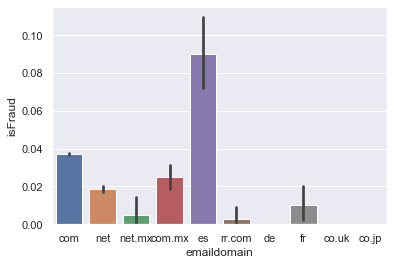

In [34]:
sns.set()
%matplotlib inline

sns.barplot (x='emaildomain', y='isFraud', data=train_data)

In [38]:
train_data.isFraud.value_counts()[:10]

Int64Index([0, 1], dtype='int64')

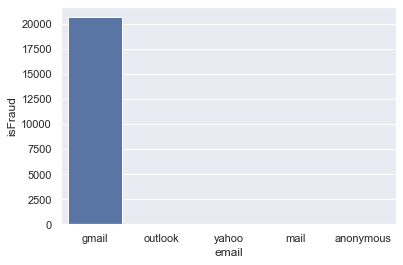

In [45]:
sns.set()
%matplotlib inline

#train_data.


sns.barplot (x=train_data.email[:10], y=train_data.isFraud.value_counts()[:10], data=train_data)

##sns.barplot (x='email', y='isFraud', data=train_data)

In [117]:
#train_data.card6.unique()#head(300)

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

Make object nulls to UNKVKN

Convert to Categorical variables (check dtypes)

Object = ProductCD, card6, card4, email, emaildomain
card1


In [268]:
train_data.ProductCD = train_data.ProductCD.fillna('UNKOWN')
train_data.card6 = train_data.card6.fillna('UNKOWN')
train_data.card4 = train_data.card4.fillna('UNKOWN')
train_data.card1 = train_data.card1.fillna('UNKOWN')
train_data.email = train_data.email.fillna('UNKOWN')
train_data.emaildomain = train_data.emaildomain.fillna('UNKOWN')



train_data[:10]

,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,...,V37,V49,V48,V51,V46,V45,V47,V43,email,emaildomain
0,2987000,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKOWN,UNKOWN
1,2987001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,gmail,com
2,2987002,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,outlook,com
3,2987003,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,yahoo,com
4,2987004,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gmail,com
5,2987005,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,gmail,com
6,2987006,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,yahoo,com
7,2987007,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,mail,com
8,2987008,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anonymous,com
9,2987009,2.0,12.0,0.0,1.0,0.0,3.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,yahoo,com


In [269]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data['ProductCD'] = labelencoder.fit_transform(train_data['ProductCD'])
train_data.ProductCD[:5]


0    4
1    4
2    4
3    4
4    1
Name: ProductCD, dtype: int32

In [270]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#train_data['ProductCD'] = labelencoder.fit_transform(train_data['ProductCD'])
train_data['email'] = labelencoder.fit_transform(train_data['email'])
train_data['card6'] = labelencoder.fit_transform(train_data['card6'])
train_data['card4'] = labelencoder.fit_transform(train_data['card4'])
train_data['card1'] = labelencoder.fit_transform(train_data['card1'])
train_data['emaildomain'] = labelencoder.fit_transform(train_data['emaildomain'])


train_data[:5]


,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,...,V37,V49,V48,V51,V46,V45,V47,V43,email,emaildomain
0,2987000,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2987001,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,16,3
2,2987002,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,28,3
3,2987003,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,43,3
4,2987004,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3


Fill the nulls with the median

In [271]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(train_data)
imputer.statistics_

X = imputer.transform(train_data)

train_data = pd.DataFrame(X, columns=train_data.columns)

train_data[:5]


,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,...,V37,V49,V48,V51,V46,V45,V47,V43,email,emaildomain
0,2987000.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2987001.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,16.0,3.0
2,2987002.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,28.0,3.0
3,2987003.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,43.0,3.0
4,2987004.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,16.0,3.0


Do it all the same for the test dataset

In [273]:
test_data_email = test_data.P_emaildomain.str.split(pat=".", n=1, expand=True)
test_data_email.columns = ['email','emaildomain']

test_data['email'] = test_data_email['email']
test_data['emaildomain'] = test_data_email['emaildomain']
test_data = test_data.drop(columns=['P_emaildomain'])

test_data[:5]

,TransactionID,card1,ProductCD,TransactionDT,isFraud,C1,C2,C3,C4,C5,...,V40,V39,V52,V38,V41,V47,V37,V43,email,emaildomain
0,3663549,10409,W,18403224,NaN,6.0,6.0,0.0,0.0,3.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,gmail,com
1,3663550,4272,W,18403263,NaN,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,aol,com
2,3663551,4476,W,18403310,NaN,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,hotmail,com
3,3663552,10989,W,18403310,NaN,5.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,gmail,com
4,3663553,18018,W,18403317,NaN,6.0,6.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,gmail,com


In [274]:
#test_data = pd.DataFrame(test_data, columns=test_data.isnull().sum().sort_values()[:196].index)
#test_data.dropna(how='all', inplace=True)


test_data.ProductCD = test_data.ProductCD.fillna('UNKNOWN')
test_data.card6 = test_data.card6.fillna('UNKNOWN')
test_data.card4 = test_data.card4.fillna('UNKNOWN')
test_data.card1 = test_data.card1.fillna('UNKNOWN')
test_data.email = test_data.email.fillna('UNKNOWN')
test_data.emaildomain = test_data.emaildomain.fillna('UNKNOWN')



from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test_data['ProductCD'] = labelencoder.fit_transform(test_data['ProductCD'])
test_data['email'] = labelencoder.fit_transform(test_data['email'])
test_data['card6'] = labelencoder.fit_transform(test_data['card6'])
test_data['card4'] = labelencoder.fit_transform(test_data['card4'])
test_data['card1'] = labelencoder.fit_transform(test_data['card1'])
test_data['emaildomain'] = labelencoder.fit_transform(test_data['emaildomain'])


test_data[:5]

,TransactionID,card1,ProductCD,TransactionDT,isFraud,C1,C2,C3,C4,C5,...,V40,V39,V52,V38,V41,V47,V37,V43,email,emaildomain
0,3663549,7171,4,18403224,NaN,6.0,6.0,0.0,0.0,3.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,16,3
1,3663550,2469,4,18403263,NaN,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3,3
2,3663551,2623,4,18403310,NaN,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,18,3
3,3663552,7617,4,18403310,NaN,5.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,16,3
4,3663553,12956,4,18403317,NaN,6.0,6.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,16,3


In [280]:
test_data.head()

,TransactionID,card1,ProductCD,TransactionDT,isFraud,C1,C2,C3,C4,C5,...,V40,V39,V52,V38,V41,V47,V37,V43,email,emaildomain
0,3663549,7171,4,18403224,NaN,6.0,6.0,0.0,0.0,3.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,16,3
1,3663550,2469,4,18403263,NaN,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3,3
2,3663551,2623,4,18403310,NaN,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,18,3
3,3663552,7617,4,18403310,NaN,5.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,16,3
4,3663553,12956,4,18403317,NaN,6.0,6.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,16,3


In [296]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(test_data)
imputer.statistics_

Xl = imputer.transform(test_data)

test_data = pd.DataFrame(Xl, columns=test_data.columns)

test_data[:5]

,TransactionID,card1,ProductCD,TransactionDT,C1,C2,C3,C4,C5,TransactionAmt,...,V40,V39,V52,V38,V41,V47,V37,V43,email,emaildomain
0,3663549.0,7171.0,4.0,18403224.0,6.0,6.0,0.0,0.0,3.0,31.953125,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,16.0,3.0
1,3663550.0,2469.0,4.0,18403263.0,3.0,2.0,0.0,0.0,0.0,49.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,3.0
2,3663551.0,2623.0,4.0,18403310.0,2.0,2.0,0.0,0.0,0.0,171.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,18.0,3.0
3,3663552.0,7617.0,4.0,18403310.0,5.0,2.0,0.0,0.0,1.0,285.000000,...,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,16.0,3.0
4,3663553.0,12956.0,4.0,18403317.0,6.0,6.0,0.0,0.0,2.0,67.937500,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,16.0,3.0


ToDo: 
Try to make floats ints, perhaps is easier for the model

In [286]:
#train_data_label = train_data.isFraud
#train_data = train_data.drop(columns=['isFraud'])

test_data_label = test_data.isFraud
test_data = test_data.drop(columns=['isFraud'])
 

In [127]:
#train_data_label = pd.to_numeric(train_data_label, downcast='signed')
#train_data_label[:5]

# Feature Selection

In [298]:
#rain_data_feature = train_data.copy() 
#rain_data_feature_label = train_data_label.copy()
test_data_feature = test_data.copy()
#est_data_feature_label = test_data_label.copy()


In [288]:
train_data_feature.shape

(590540, 196)

In [289]:
test_data_feature.shape

(506691, 196)

In [290]:
%%time
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False,max_iter=2500))

m.fit(train_data_feature, train_data_feature_label)


Wall time: 16min 8s


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    loss='squared_hinge', max_iter=2500,
                                    multi_class='ovr', penalty='l1',
                                    random_state=None, tol=0.0001, verbose=0),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [206]:
#print(m.get_support())

mapping = pd.DataFrame(m.get_support())




(196, 1)

In [291]:
pd.set_option('display.max_rows', 9999)
test_data.dtypes.sort_values()

TransactionID       int32
V28               float16
V16               float16
V17               float16
V18               float16
V19               float16
V20               float16
V27               float16
V24               float16
V23               float16
V15               float16
V25               float16
V21               float16
V65               float16
V64               float16
V74               float16
V72               float16
V71               float16
V70               float16
V69               float16
V68               float16
V26               float16
V14               float16
V34               float16
V30               float16
V313              float16
D1                float16
V300              float16
V301              float16
V282              float16
V315              float16
card3             float16
card6               int32
card4               int32
card5             float16
card2             float16
addr2             float16
addr1             float16
D10         

In [292]:
pd.set_option('display.max_rows', 9999)
train_data_feature.dtypes.sort_values()

TransactionID     float64
V15               float64
V28               float64
V34               float64
V33               float64
V32               float64
V31               float64
V22               float64
V14               float64
V29               float64
V27               float64
V12               float64
V13               float64
V53               float64
V54               float64
V55               float64
V56               float64
V57               float64
V58               float64
V59               float64
V60               float64
V30               float64
V26               float64
V25               float64
V23               float64
V281              float64
V314              float64
V288              float64
V283              float64
V296              float64
V289              float64
card3             float64
card6             float64
card4             float64
card5             float64
card2             float64
addr2             float64
addr1             float64
D10         

In [294]:
train_data_tr = pd.DataFrame(m.transform(train_data_feature)) #.shape

In [299]:
test_data_tr = pd.DataFrame(m.transform(test_data_feature))

In [300]:
train_data_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16.0,3.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,28.0,3.0
3,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,43.0,3.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16.0,3.0


In [301]:
train_data_feature.shape

(590540, 196)

In [305]:
train_data_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16.0,3.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,28.0,3.0
3,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,43.0,3.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16.0,3.0


In [304]:
test_data_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,7171.0,4.0,18403224.0,6.0,6.0,0.0,0.0,3.0,31.953125,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,16.0,3.0
1,2469.0,4.0,18403263.0,3.0,2.0,0.0,0.0,0.0,49.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0
2,2623.0,4.0,18403310.0,2.0,2.0,0.0,0.0,0.0,171.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,18.0,3.0
3,7617.0,4.0,18403310.0,5.0,2.0,0.0,0.0,1.0,285.000000,0.0,...,2.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,16.0,3.0
4,12956.0,4.0,18403317.0,6.0,6.0,0.0,0.0,2.0,67.937500,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,16.0,3.0


In [306]:
#from sklearn.linear_model import LassoCV
#m = SelectFromModel(LassoCV(max_iter=250))
#m.fit(train_data_feature, train_data_feature_label)
#m.transform(train_data_feature).shape

In [307]:
train_data.shape

(590540, 196)

In [308]:
train_data.head()

,TransactionID,C14,C13,C12,C11,C10,C9,C8,C7,C6,...,V37,V49,V48,V51,V46,V45,V47,V43,email,emaildomain
0,2987000.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2987001.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,16.0,3.0
2,2987002.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,28.0,3.0
3,2987003.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,43.0,3.0
4,2987004.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,16.0,3.0


# Analytics

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data_tr, train_data_label, test_size=0.2)
lr = LogisticRegression(C=0.12, class_weight='balanced', max_iter=2500 )
lr = lr.fit(x_train, y_train)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
print(test_data.columns)
print(train_data_tr.columns)

In [313]:
import csv

y_sub_predict = lr.predict_proba(x_test)

csv_data = [['TransactionID', 'isFraud']]

fraud_dict = { 'fraud': 0, 'not_fraud': 0 }
for i in range(0, len(y_sub_predict)):
  csv_data.append([test_data['TransactionID'][i], y_sub_predict[i][0]])
  if y_sub_predict[i][0] >= 0.5:
    fraud_dict['fraud'] += 1
  else:
    fraud_dict['not_fraud'] += 1
print(fraud_dict)

{'fraud': 88401, 'not_fraud': 29707}


In [ ]:
print(len(csv_data))

In [ ]:
with open('submission_v4-3_18090630.csv', 'w') as csv_file:
  writer = csv.writer(csv_file)
  writer.writerows(csv_data)

csv_file.close()